# 1) Objetivos e Base de Dados

Vamos realizar algumas análises sobre o dataset de empresas unicórnios para tirar alguns insights.

"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão.

Download da base de dados: https://www.kaggle.com/ramjasmaurya/unicorn-startups

#2) importando as Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3) Importando DF

In [2]:
# Importando arquivo do dataset baixado
from google.colab import files
uploaded = files.upload()

Saving Startups+in+2021+end.csv to Startups+in+2021+end.csv


In [3]:
df = pd.read_csv('Startups+in+2021+end.csv')
df

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...,...
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"


#4) Limpeza e tratamento dos dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [5]:
# Renomerar as colunas 
df.rename(columns={'Unnamed: 0': 'Index',
                   'Company': 'Empresa',
                   'Valuation ($B)': 'Valor',
                   'Date Joined': 'Data',
                   'Country':'Pais', 
                   'City':'Cidade',
                   'Industry':'Ramo',
                   'Select Investors':'Investidores'
                   }, inplace=True)

In [6]:
# Ajustando a coluna Pais
df.Pais = df.Pais.apply(lambda x: str(x).replace(',', ''))

In [7]:
# Ajustar a coluna valor
df.Valor = df.Valor.apply(lambda x: str(x).replace('$', ''))
df.Valor = df.Valor.astype(float)

In [8]:
# Ajustando a coluna Data para formato datetime
df.Data = pd.to_datetime(df.Data, format='%m/%d/%Y')

In [9]:
df['Ramo'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [10]:
# Ajustando coluna Ramo
df.loc[ (df['Ramo'] == 'Finttech'), 'Ramo'] = 'Fintech'

In [11]:
df.head()

,Index,Empresa,Valor,Data,Pais,Cidade,Ramo,Investidores
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Index         936 non-null    int64         
 1   Empresa       936 non-null    object        
 2   Valor         936 non-null    float64       
 3   Data          936 non-null    datetime64[ns]
 4   Pais          936 non-null    object        
 5   Cidade        921 non-null    object        
 6   Ramo          936 non-null    object        
 7   Investidores  935 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 58.6+ KB


In [13]:
# Verificando quantos valores nulos temos
df.isnull().sum()

Index            0
Empresa          0
Valor            0
Data             0
Pais             0
Cidade          15
Ramo             0
Investidores     1
dtype: int64

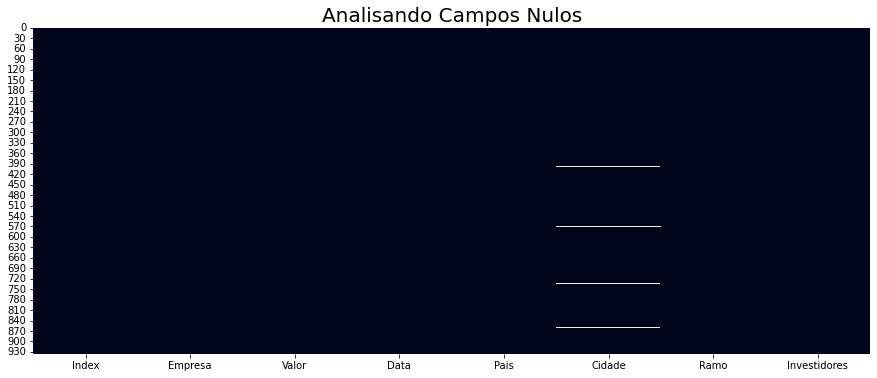

In [14]:
plt.figure( figsize=(15,6) )
plt.title('Analisando Campos Nulos', fontsize=20)
sns.heatmap( df.isnull(), cbar=False );

#5) Exploração dos dados

In [15]:
# Criando colunas de mês e ano
df['Ano'] = df.Data.dt.year
df['Mês'] = df.Data.dt.month

In [16]:
df_agrupado = df.groupby(by=['Pais','Ano','Mês','Empresa']).count().Index.reset_index()
df_agrupado

,Pais,Ano,Mês,Empresa,Index
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Jokr,1
932,United States,2021,12,Panther Labs,1
933,United States,2021,12,ReliaQuest,1
934,United States,2021,12,YipitData,1


In [17]:
# Verificando no ano de 2021 quantos unicórnios tivemos por país
df_filtrado = df_agrupado[ df_agrupado['Ano'] == 2021 ].groupby(by=['Pais']).sum().Index.reset_index().sort_values(by=['Index'], ascending=False)
df_filtrado

,Pais,Index
36,United States,280
7,China,37
14,India,31
35,United Kingdom,16
12,Germany,15
17,Israel,14
5,Canada,14
11,France,10
27,Singapore,9
4,Brazil,5


In [18]:
# Renomeando os demais países para não poluir o gráfico
lista_agrupar = list(df_filtrado [df_filtrado.Index <= 5].Pais)

for p in lista_agrupar:
  df_filtrado.loc[ (df_filtrado['Pais'] == p), 'Pais'] = 'Outros'

In [19]:
# Agrupando os países
df_filtrado = df_filtrado.groupby(by='Pais').sum().Index.reset_index().sort_values(by=['Index'], ascending=False)
df_filtrado

,Pais,Index
9,United States,280
6,Outros,54
1,China,37
4,India,31
8,United Kingdom,16
3,Germany,15
0,Canada,14
5,Israel,14
2,France,10
7,Singapore,9


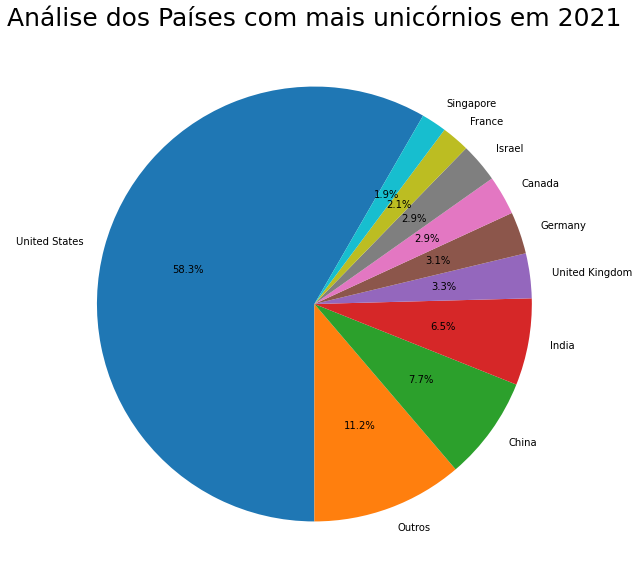

In [20]:
# Plotando em gráfico
plt.figure(figsize=(13,10))
plt.title('Análise dos Países com mais unicórnios em 2021', fontsize=25)
plt.pie(df_filtrado.Index, labels=df_filtrado.Pais,
        startangle=60, autopct='%1.1f%%');

In [21]:
# Verificar os top 10 países com mais unicórnios
df.Pais.value_counts()[:10]

United States     478
China             169
India              51
United Kingdom     37
Germany            23
Israel             21
France             19
Canada             15
Brazil             15
South Korea        11
Name: Pais, dtype: int64

Podemos verificar que só os EUA geram mais da metade dos unicórnios, e que analisando o gráfico de pizza com o levantamento anterior vemos que basicamente são sempre os mesmos países que geram as maiores quantidades de unicórnios.

In [22]:
# Analisando os ramos de atuação
df.Ramo.value_counts()

Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Name: Ramo, dtype: int64

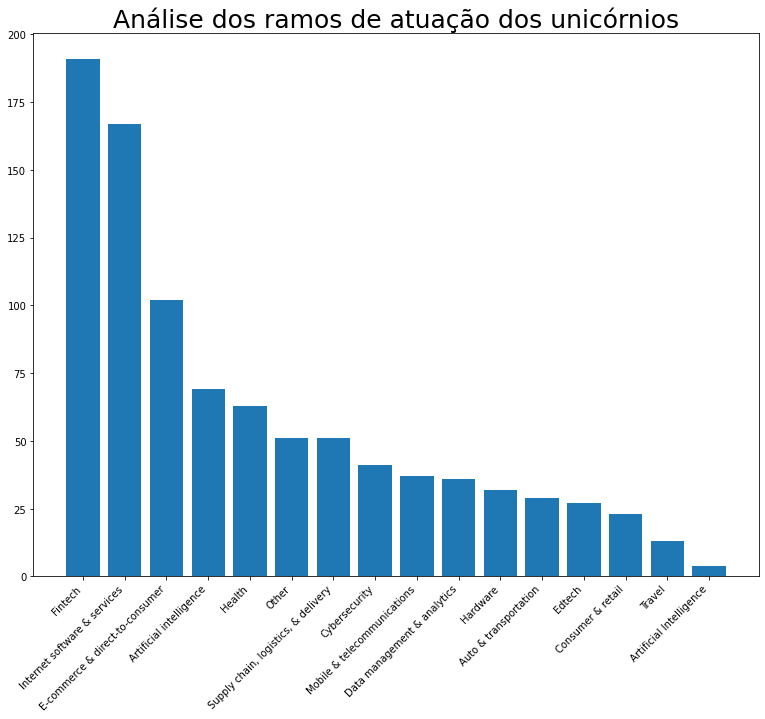

In [24]:
# Plotando em gráfico de barras para os tipos de empresas
plt.figure(figsize=(13,10))
plt.title('Análise dos ramos de atuação dos unicórnios', fontsize=25)
plt.bar(df.Ramo.value_counts().index, df.Ramo.value_counts(),
        )
plt.xticks( rotation=45, ha='right' );

Pelo gráfico anterior podemos ver que as `Fintech` e `Internet software & services` são os ramos de atuação que mais geram unicórnios.